In [ ]:
# !pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv("annual-co-emissions-by-region.csv")


In [3]:
df

,Entity,Code,Year,Annual CO₂ emissions (zero filled)
0,Afghanistan,AFG,1750,0.0
1,Afghanistan,AFG,1751,0.0
2,Afghanistan,AFG,1752,0.0
3,Afghanistan,AFG,1753,0.0
4,Afghanistan,AFG,1754,0.0
...,...,...,...,...
73163,Zimbabwe,ZWE,2017,9596071.0
73164,Zimbabwe,ZWE,2018,11795478.0
73165,Zimbabwe,ZWE,2019,11114607.0
73166,Zimbabwe,ZWE,2020,10607897.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73168 entries, 0 to 73167
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entity                              73168 non-null  object 
 1   Code                                63376 non-null  object 
 2   Year                                73168 non-null  int64  
 3   Annual CO₂ emissions (zero filled)  73168 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [3]:
df.shape

(73168, 4)

In [7]:
df.Code.unique()

array(['AFG', nan, 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATA', 'ATG',
       'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL', 'CHN', 'CXR', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FLK', 'FJI', 'FIN',
       'FRA', 'GUF', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC',
       'GRL', 'GRD', 'GLP', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL',
       'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN',
       'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR',
       'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV',
       'ML

In [ ]:
df.isna().sum()

Entity                                   0
Code                                  9792
Year                                     0
Annual CO₂ emissions (zero filled)       0
dtype: int64

In [ ]:
df[df.isna().any(axis=1)][['Entity','Code']]


,Entity,Code
272,Africa,NaN
273,Africa,NaN
274,Africa,NaN
275,Africa,NaN
276,Africa,NaN
...,...,...
70171,Upper-middle-income countries,NaN
70172,Upper-middle-income countries,NaN
70173,Upper-middle-income countries,NaN
70174,Upper-middle-income countries,NaN


In [5]:
df = df.rename(columns={'Annual CO₂ emissions (zero filled)': 'annual'}) 
df

,Entity,Code,Year,annual
0,Afghanistan,AFG,1750,0.0
1,Afghanistan,AFG,1751,0.0
2,Afghanistan,AFG,1752,0.0
3,Afghanistan,AFG,1753,0.0
4,Afghanistan,AFG,1754,0.0
...,...,...,...,...
73163,Zimbabwe,ZWE,2017,9596071.0
73164,Zimbabwe,ZWE,2018,11795478.0
73165,Zimbabwe,ZWE,2019,11114607.0
73166,Zimbabwe,ZWE,2020,10607897.0


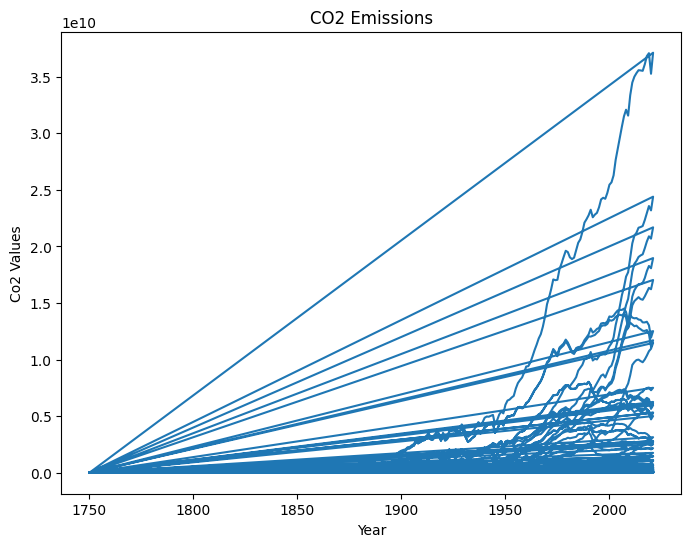

In [21]:
plt.figure(figsize = (8,6))
plt.plot(df['Year'].values,df['annual'].values)

plt.xlabel('Year')
plt.ylabel('Co2 Values')
plt.title('CO2 Emissions')

plt.show()

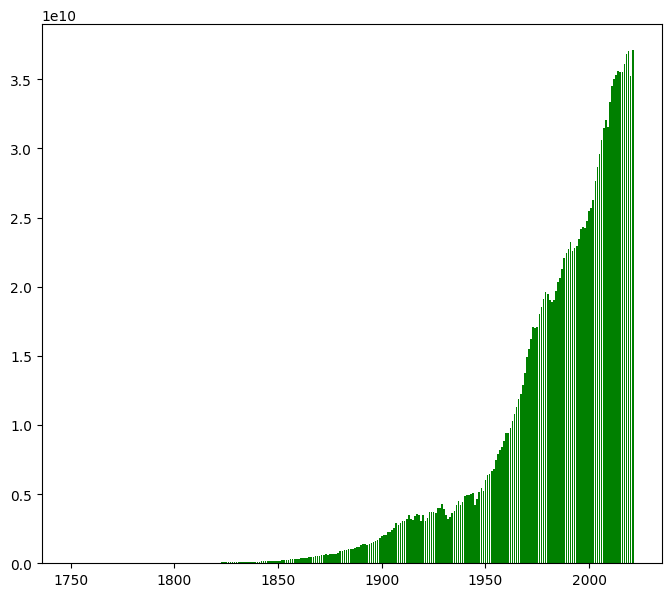

In [ ]:
assy = df[df['annual'] != 0.0]
assx = assy[assy['annual'] != 0.0]['Year']
plt.figure(figsize = (8,7))
plt.bar(assx,assy['annual'],color='Green')
plt.show()

In [ ]:
df.groupby('Code')['annual'].mean() # bölgeler göre co2 emisyon ortalamaları

Code
ABW    2.825952e+05
AFG    8.014451e+05
AGO    2.415866e+06
AIA    1.319261e+04
ALB    1.080290e+06
           ...     
WSM    2.625906e+04
YEM    2.395576e+06
ZAF    7.891581e+07
ZMB    9.472854e+05
ZWE    2.934622e+06
Name: annual, Length: 233, dtype: float64

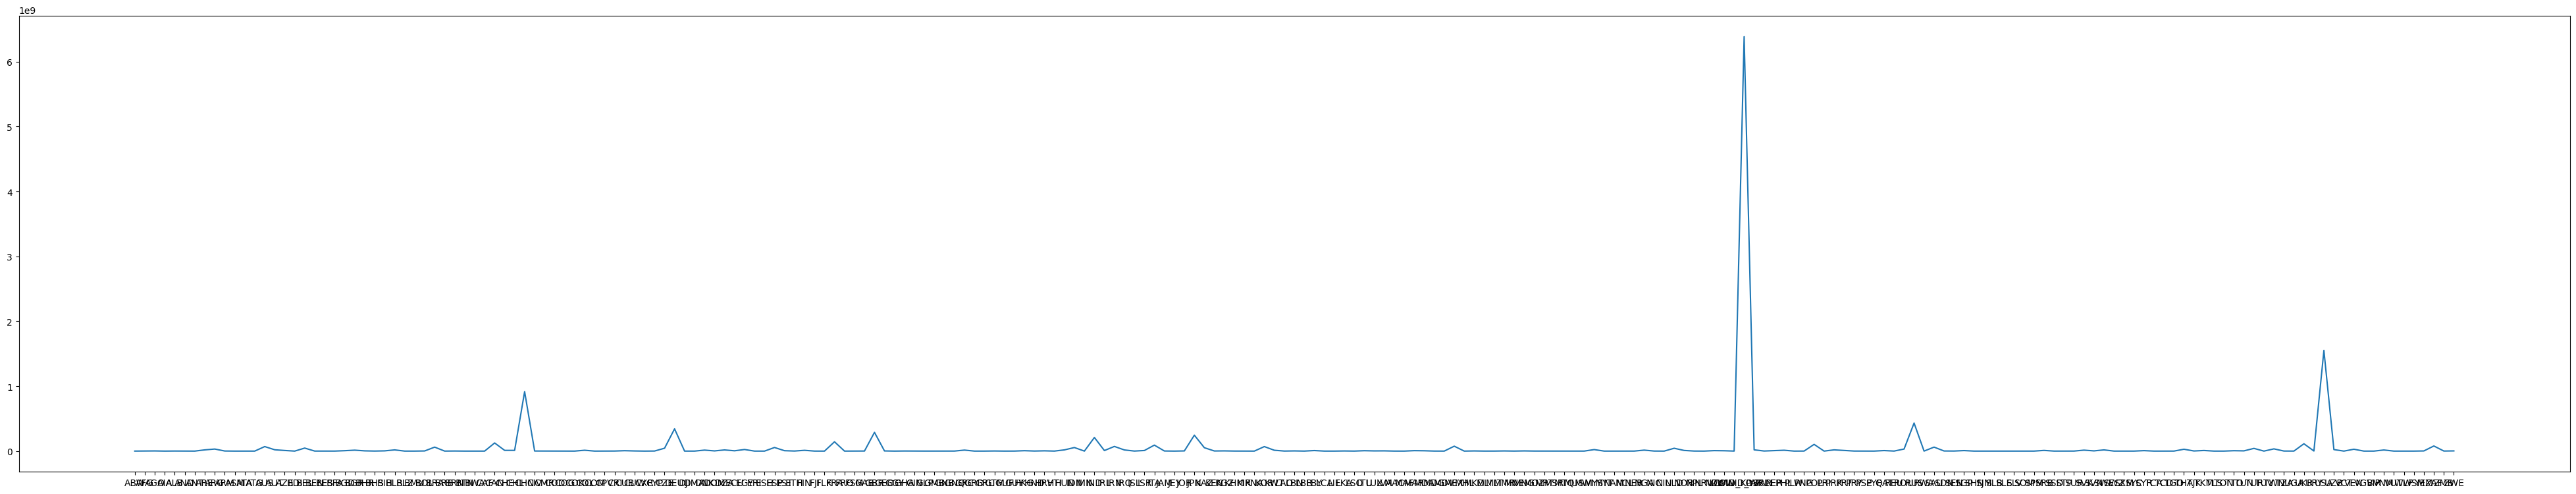

In [ ]:
plt.figure(figsize = (50,9))
groupdata =df.groupby('Code')['annual'].mean()

plt.plot(groupdata.index,groupdata.values)
plt.show()

In [13]:
df.groupby(by= ['Year','Code'])['annual'].mean() # Yıl ve kod numaralarına göre ülkelerin CO2 emisyon ortalamaları


Year  Code
1750  ABW             0.0
      AFG             0.0
      AGO             0.0
      AIA             0.0
      ALB             0.0
                 ...     
2021  WSM        294080.0
      YEM      12476597.0
      ZAF     435928900.0
      ZMB       7676180.0
      ZWE      11296114.0
Name: annual, Length: 63376, dtype: float64

In [16]:
df.groupby(['Code'])['annual'].max()

Code
ABW      2821280.0
AFG     11874211.0
AGO     30329742.0
AIA       153888.0
ALB      8986169.0
          ...     
WSM       294080.0
YEM     27160406.0
ZAF    494999700.0
ZMB      7747163.0
ZWE     17393590.0
Name: annual, Length: 233, dtype: float64

In [11]:
yearly_emissions = df.groupby('Year')['annual'].sum()
percentage_change = yearly_emissions.pct_change() * 100
percentage_change[percentage_change < 0] = 0
percentage_change

Year
1750         NaN
1751    0.000000
1752    0.039185
1753    0.000000
1754    0.039170
          ...   
2017    1.527143
2018    1.808471
2019    0.496087
2020    0.000000
2021    5.176966
Name: annual, Length: 272, dtype: float64

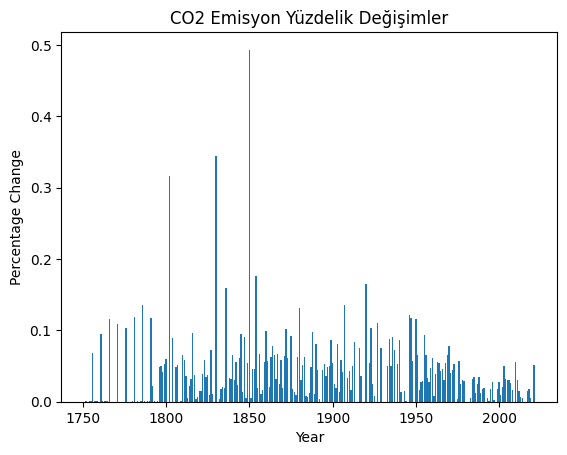

In [10]:
plt.bar(percentage_change.index, percentage_change.values)
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('CO2 Emisyon Yüzdelik Değişimler')
plt.show()


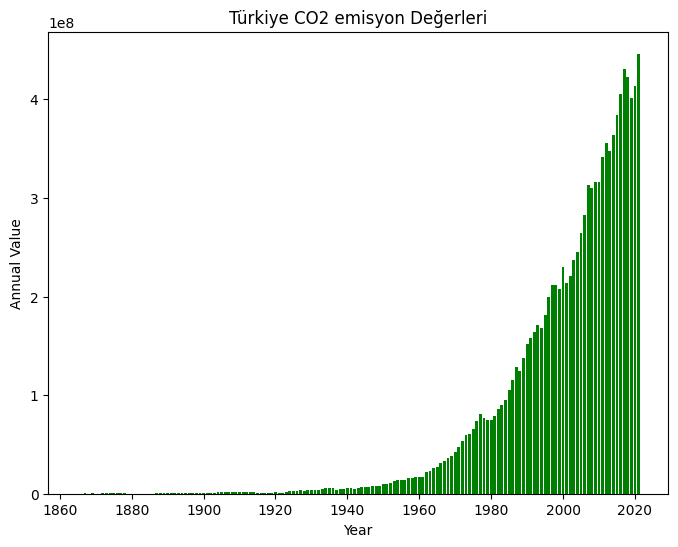

In [ ]:
atsy = df[df['Code'] == 'TUR']
atsx = atsy[atsy['annual'] != 0.0]['Year']
plt.figure(figsize = (8,6))

plt.bar(atsx, atsy[atsy['annual'] != 0.0]['annual'], color='green')
plt.xlabel('Year')
plt.ylabel('Annual Value')
plt.title('Türkiye CO2 emisyon Değerleri')


plt.show()


In [5]:
indicator = 'TUR'
years = int(input('Yıl Giriniz(1750-2020): '))

mask1 = df['Code'].str.contains(indicator)
mask2 = df['Year'].isin([years])


co2 = df[mask1 & mask2]
co2.head()

Ülke kod giriniz (TUR - ZWE...)TUR
Yıl Giriniz(1750-2020): 1990


,Entity,Code,Year,annual
67424,Turkey,TUR,1990,151664530.0
